<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home work 11 by
# Kravchenko Serhii

Recurrent neural networks RNN

RNN with GRU, LSTM

Bidirectional RNN

Deep RNN

In [1]:
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Recurrent neural networks RNN

In [5]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32, input_length=maxlen))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(units=1, activation='sigmoid'))

In [6]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# train:
history = model_rnn.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=7,
                        validation_data=(X_test, y_test)
                        )

Epoch 1/7
196/196 [==============================] - 58s 279ms/step - loss: 0.5458 - accuracy: 0.7239 - val_loss: 0.4043 - val_accuracy: 0.8288
Epoch 2/7
196/196 [==============================] - 51s 263ms/step - loss: 0.3481 - accuracy: 0.8569 - val_loss: 0.3576 - val_accuracy: 0.8481
Epoch 3/7
196/196 [==============================] - 54s 275ms/step - loss: 0.2510 - accuracy: 0.9026 - val_loss: 0.3374 - val_accuracy: 0.8570
Epoch 4/7
196/196 [==============================] - 53s 272ms/step - loss: 0.2322 - accuracy: 0.9114 - val_loss: 0.3494 - val_accuracy: 0.8639
Epoch 5/7
196/196 [==============================] - 54s 273ms/step - loss: 0.1811 - accuracy: 0.9333 - val_loss: 0.4039 - val_accuracy: 0.8460
Epoch 6/7
196/196 [==============================] - 53s 271ms/step - loss: 0.1433 - accuracy: 0.9478 - val_loss: 0.4327 - val_accuracy: 0.8498
Epoch 7/7
196/196 [==============================] - 53s 270ms/step - loss: 0.0993 - accuracy: 0.9656 - val_loss: 0.4533 - val_accuracy:

In [9]:
results_rnn = model_rnn.evaluate(X_test, y_test)
results_rnn

782/782 [==============================] - 26s 33ms/step - loss: 0.4533 - accuracy: 0.8462


[0.45327407121658325, 0.8461999893188477]

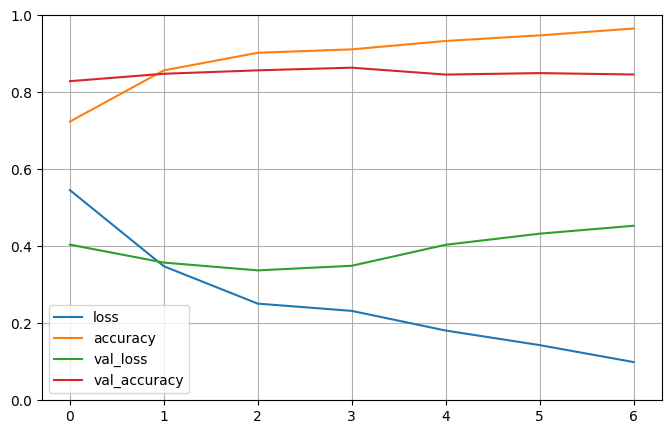

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
predictions = model_rnn.predict(X_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 [==============================] - 27s 34ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 25s 32ms/step - loss: 0.4533 - accuracy: 0.8462
Test Loss: 0.45327407121658325
Test Accuracy: 0.8461999893188477


# LSTM

In [12]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(units=1, activation='sigmoid'))

In [13]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_1 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# train:
history_lstm = model_lstm.fit(X_train,
                              y_train,
                              batch_size=128,
                              epochs=7,
                              validation_data=(X_test, y_test)
                              )

Epoch 1/7
196/196 [==============================] - 109s 542ms/step - loss: 0.4951 - accuracy: 0.7513 - val_loss: 0.3638 - val_accuracy: 0.8450
Epoch 2/7
196/196 [==============================] - 127s 649ms/step - loss: 0.2735 - accuracy: 0.8924 - val_loss: 0.3186 - val_accuracy: 0.8713
Epoch 3/7
196/196 [==============================] - 123s 629ms/step - loss: 0.2034 - accuracy: 0.9252 - val_loss: 0.3104 - val_accuracy: 0.8759
Epoch 4/7
196/196 [==============================] - 126s 642ms/step - loss: 0.1619 - accuracy: 0.9415 - val_loss: 0.3644 - val_accuracy: 0.8613
Epoch 5/7
196/196 [==============================] - 124s 635ms/step - loss: 0.1293 - accuracy: 0.9541 - val_loss: 0.3912 - val_accuracy: 0.8607
Epoch 6/7
196/196 [==============================] - 127s 649ms/step - loss: 0.1111 - accuracy: 0.9611 - val_loss: 0.3989 - val_accuracy: 0.8654
Epoch 7/7
196/196 [==============================] - 124s 632ms/step - loss: 0.0933 - accuracy: 0.9681 - val_loss: 0.4299 - val_ac

In [16]:
results_lstm = model_lstm.evaluate(X_test, y_test)
results_lstm

782/782 [==============================] - 45s 58ms/step - loss: 0.4299 - accuracy: 0.8637


[0.4298579692840576, 0.8637199997901917]

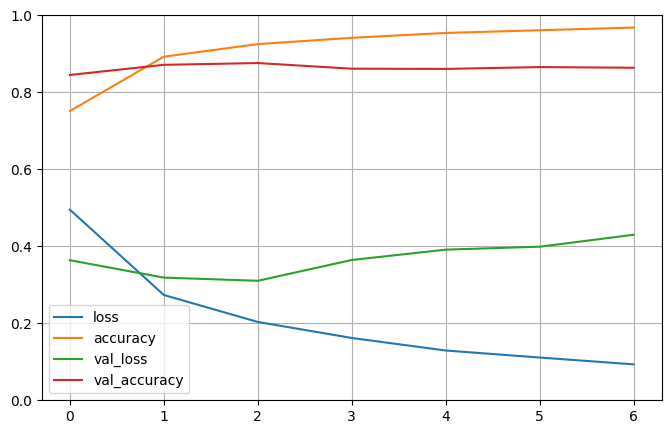

In [17]:
pd.DataFrame(history_lstm.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
predictions = model_lstm.predict(X_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 45s 57ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 47s 60ms/step - loss: 0.4299 - accuracy: 0.8637
Test Loss: 0.4298579692840576
Test Accuracy: 0.8637199997901917


# Bidirectional RNN

In [19]:
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Dropout(0.2))
model_brnn.add(Bidirectional(LSTM(32)))
model_brnn.add(Dense(units=1, activation='sigmoid'))

In [20]:
model_brnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_brnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# train:
history_brnn = model_brnn.fit(X_train,
                              y_train,
                              batch_size=128,
                              epochs=7,
                              validation_data=(X_test, y_test)
                              )

Epoch 1/7
196/196 [==============================] - 191s 953ms/step - loss: 0.5101 - accuracy: 0.7402 - val_loss: 0.3406 - val_accuracy: 0.8575
Epoch 2/7
196/196 [==============================] - 186s 951ms/step - loss: 0.2624 - accuracy: 0.8986 - val_loss: 0.2957 - val_accuracy: 0.8747
Epoch 3/7
196/196 [==============================] - 187s 955ms/step - loss: 0.2020 - accuracy: 0.9255 - val_loss: 0.3088 - val_accuracy: 0.8775
Epoch 4/7
196/196 [==============================] - 184s 940ms/step - loss: 0.1648 - accuracy: 0.9431 - val_loss: 0.3073 - val_accuracy: 0.8722
Epoch 5/7
196/196 [==============================] - 186s 949ms/step - loss: 0.1330 - accuracy: 0.9550 - val_loss: 0.3684 - val_accuracy: 0.8692
Epoch 6/7
196/196 [==============================] - 188s 959ms/step - loss: 0.1072 - accuracy: 0.9652 - val_loss: 0.3901 - val_accuracy: 0.8618
Epoch 7/7
196/196 [==============================] - 186s 953ms/step - loss: 0.1160 - accuracy: 0.9576 - val_loss: 0.4914 - val_ac

In [23]:
results_brnn = model_brnn.evaluate(X_test, y_test)
results_brnn

782/782 [==============================] - 75s 96ms/step - loss: 0.4914 - accuracy: 0.7607


[0.4913758337497711, 0.7606800198554993]

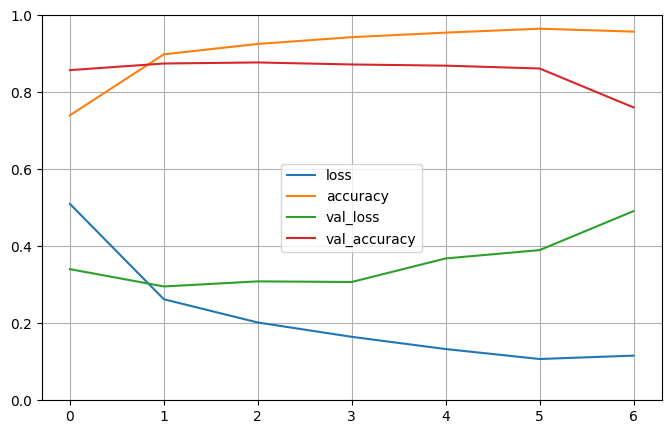

In [24]:
pd.DataFrame(history_brnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
predictions = model_brnn.predict(X_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_brnn.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 74s 93ms/step
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 74s 94ms/step - loss: 0.4914 - accuracy: 0.7607
Test Loss: 0.4913758337497711
Test Accuracy: 0.7606800198554993


# DeepBRNN

In [26]:
model_dbrnn = Sequential()
model_dbrnn.add(Embedding(max_features, 32, input_length=maxlen))
model_dbrnn.add(Dropout(0.2))
model_dbrnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_dbrnn.add(Bidirectional(LSTM(32)))
model_dbrnn.add(Dense(units=1, activation='sigmoid'))

In [27]:
model_dbrnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_3 (Dropout)         (None, 500, 32)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 64)          16640     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-tr

In [28]:
model_dbrnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# train:
history_dbrnn = model_dbrnn.fit(X_train,
                              y_train,
                              batch_size=128,
                              epochs=7,
                              validation_data=(X_test, y_test)
                              )

Epoch 1/7
196/196 [==============================] - 471s 2s/step - loss: 0.4869 - accuracy: 0.7577 - val_loss: 0.3566 - val_accuracy: 0.8527
Epoch 2/7
196/196 [==============================] - 458s 2s/step - loss: 0.2550 - accuracy: 0.8998 - val_loss: 0.3110 - val_accuracy: 0.8724
Epoch 3/7
196/196 [==============================] - 408s 2s/step - loss: 0.1976 - accuracy: 0.9274 - val_loss: 0.3132 - val_accuracy: 0.8761
Epoch 4/7
196/196 [==============================] - 459s 2s/step - loss: 0.1522 - accuracy: 0.9463 - val_loss: 0.3349 - val_accuracy: 0.8666
Epoch 5/7
196/196 [==============================] - 460s 2s/step - loss: 0.1202 - accuracy: 0.9592 - val_loss: 0.3993 - val_accuracy: 0.8679
Epoch 6/7
196/196 [==============================] - 459s 2s/step - loss: 0.1005 - accuracy: 0.9681 - val_loss: 0.4407 - val_accuracy: 0.8616
Epoch 7/7
196/196 [==============================] - 459s 2s/step - loss: 0.0864 - accuracy: 0.9718 - val_loss: 0.4426 - val_accuracy: 0.8673


In [30]:
results_dbrnn = model_dbrnn.evaluate(X_test, y_test)
results_dbrnn

782/782 [==============================] - 155s 198ms/step - loss: 0.4426 - accuracy: 0.8673


[0.442562460899353, 0.8673200011253357]

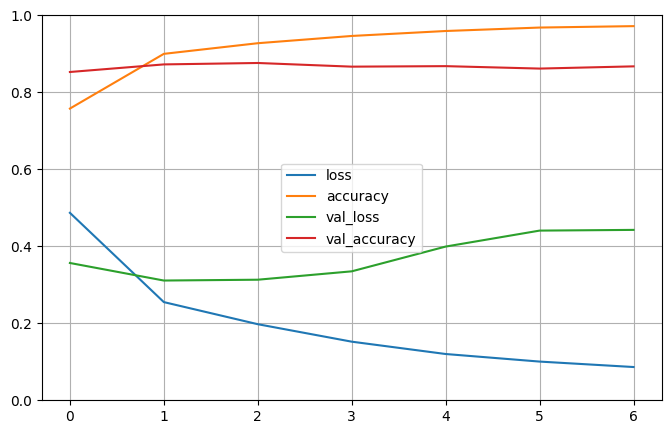

In [31]:
pd.DataFrame(history_dbrnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
predictions = model_dbrnn.predict(X_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = ['positive' if pred > 0.5 else 'negative' for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Label: {'positive' if y_test[i] > 0.5 else 'negative'}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_dbrnn.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 151s 190ms/step
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: positive, Label: positive
Predicted: negative, Label: negative
Predicted: positive, Label: negative
Predicted: positive, Label: positive
782/782 [==============================] - 150s 192ms/step - loss: 0.4426 - accuracy: 0.8673
Test Loss: 0.442562460899353
Test Accuracy: 0.8673200011253357


In [41]:
print(f'Accuracy: RNN = {results_rnn[1]}, LSTM = {results_lstm[1]}, DRNN = {results_brnn[1]}, DBRNN = {results_dbrnn[1]}')

Accuracy: RNN = 0.8461999893188477, LSTM = 0.8637199997901917, DRNN = 0.7606800198554993, DBRNN = 0.8673200011253357


# Найбільше значення Val_accuracy

# RNN
Epoch 4/7
196/196 [==============================] - 53s 272ms/step - loss: 0.2322 - accuracy: 0.9114 - val_loss: 0.3494 - val_accuracy: 0.8639
# LSTM
Epoch 3/7
196/196 [==============================] - 123s 629ms/step - loss: 0.2034 - accuracy: 0.9252 - val_loss: 0.3104 - val_accuracy: 0.8759
# BRNN
Epoch 3/7
196/196 [==============================] - 187s 955ms/step - loss: 0.2020 - accuracy: 0.9255 - val_loss: 0.3088 - val_accuracy: 0.8775
# DBRNN
Epoch 3/7
196/196 [==============================] - 408s 2s/step - loss: 0.1976 - accuracy: 0.9274 - val_loss: 0.3132 - val_accuracy: 0.8761

# Висновок

Всі використані рекурентні нейронні мережі показали високий та відносно рівний результат. З графіків встановлено, що після 3-ї єпохи в усіх нейромережах відбувалося перенавчання. Найбільшу точність показала глибока двустороння рекурентна нейронна мережа(Deep BRNN), але на її навчання потрібно більше часу аніж на інші мережі, та треба враховувати її перенавчання.